In [256]:
import pyreadstat 
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from scipy.stats import poisson, lognorm, pareto, expon, norm
import numpy as np
import matplotlib.pyplot as plt
from math import exp

In [2]:
file_path = '/Users/user/Downloads/r29i_os_73.sav'
df, meta = pyreadstat.read_sav(file_path)

## Отпуск

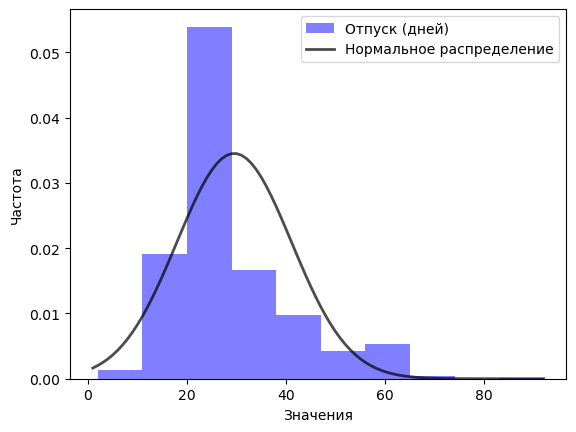

In [422]:
vac = df['yj21b'].dropna().tolist()
vac=np.array([i for i in vac if i<120]) ####### <- ГРАНИЦЫ ВЫБРОСОВ

μ_hat_vac = np.mean(vac)
σ_hat_vac =np.sqrt(sum([(i-μ_hat_vac)**2 for i in vac])/(len(vac)-1))

plt.hist(vac, bins=10, density=True, alpha=0.5, color='b', label='Отпуск (дней)')
x = np.arange(int(min(vac))-1, int(max(vac))+1 )
pdf = norm.pdf(x, loc=μ_hat_vac, scale=σ_hat_vac)
plt.plot(x, pdf, color='k', linestyle='-', linewidth=2, alpha=0.7, label='Нормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()


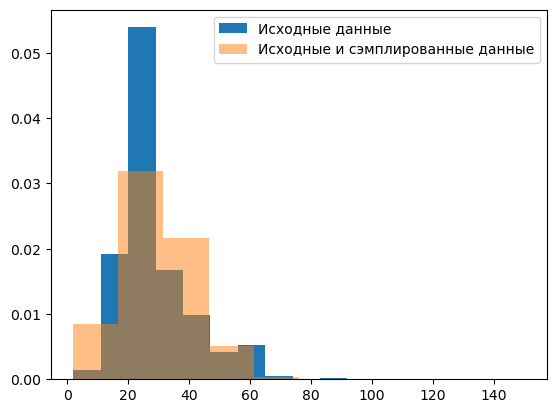

In [514]:
vac2 = np.array(df['yj21b'].tolist())
vac2[vac2 > 200] = np.nan

vac2_s = []
v_size=np.sum(np.isnan(vac2))
while len(vac2_s) < v_size:
    samples = np.random.normal(μ_hat_vac, σ_hat_vac, size=100) 
    filtered_samples = samples[(samples >= min(vac[~np.isnan(vac)]) ) & (samples <= max(vac[~np.isnan(vac)]))] 
    vac2_s.extend(filtered_samples[:v_size - len(vac2_s)])  

vac2_s = np.array(vac2_s) 
vac2_s = np.ceil(vac2_s).astype(int) 

vac2[np.isnan(vac2)] = vac2_s

plt.hist(vac, density=True, label='Исходные данные')
plt.hist(vac2, density=True, alpha=0.5, label='Исходные и сэмплированные данные')
plt.legend()
plt.show()

## Рабочая неделя

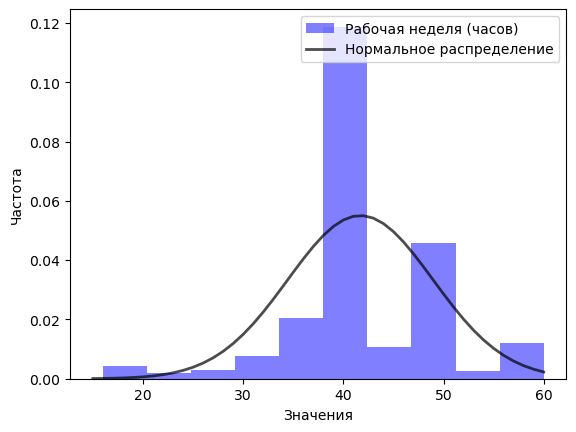

In [518]:
ww = df['yj6.2'].dropna().tolist()
ww=np.array([i for i in ww if i<61 and i>15]) ####### <- ГРАНИЦЫ ВЫБРОСОВ

μ_hat_ww = np.mean(ww)
σ_hat_ww =np.sqrt(sum([(i-μ_hat_ww)**2 for i in ww])/(len(ww)-1))

plt.hist(ww, bins=10, density=True, alpha=0.5, color='b', label='Рабочая неделя (часов)')
x = np.arange(int(min(ww))-1, int(max(ww))+1 )
pdf = norm.pdf(x, loc=μ_hat_ww, scale=σ_hat_ww)
plt.plot(x, pdf, color='k', linestyle='-', linewidth=2, alpha=0.7, label='Нормальное распределение')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.legend()
plt.show()

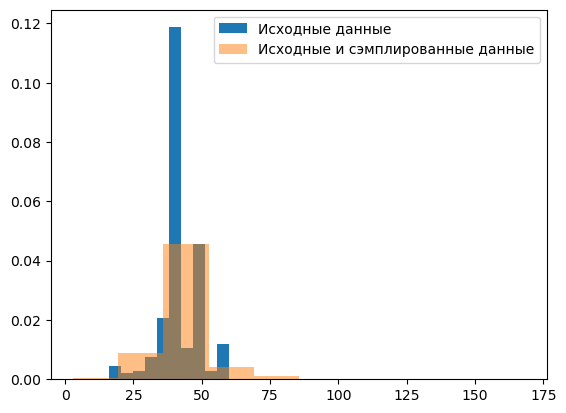

In [516]:
ww2 = np.array(df['yj6.2'].tolist())
ww2[ww2 > 99999996] = np.nan

ww2_s = []
ww_size=np.sum(np.isnan(ww2))
while len(ww2_s) < ww_size:
    samples = np.random.normal(μ_hat_ww, σ_hat_ww, size=100) 
    filtered_samples = samples[(samples >= min(ww[~np.isnan(ww)]) ) & (samples <= max(ww[~np.isnan(ww)]))] 
    ww2_s.extend(filtered_samples[:ww_size - len(ww2_s)])  

ww2_s = np.array(ww2_s)
ww2_s = np.ceil(ww2_s).astype(int)

ww2[np.isnan(ww2)] = ww2_s

plt.hist(ww, density=True, label='Исходные данные')
plt.hist(ww2, density=True, alpha=0.5, label='Исходные и сэмплированные данные')
plt.legend()
plt.show()

## Премия

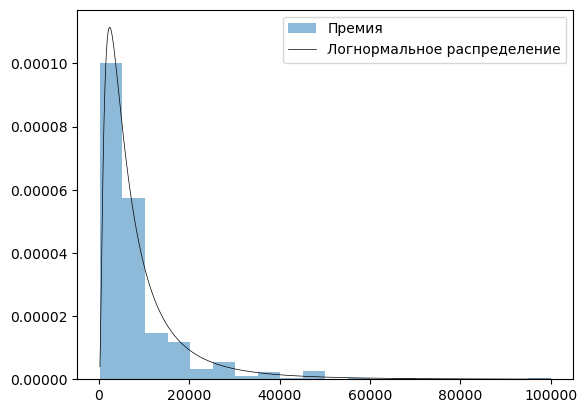

In [567]:
bon = df['yj10.2'].dropna().tolist()

#bon = [1 if i == 99999996.0 else i for i in bon if i < 99999997]
bon = [i for i in bon if i < 99999996]

#https://intro.quantecon.org/mle.html

ln_bon = np.log(bon)
μ_hat_bon = np.mean(ln_bon)
num = (ln_bon - μ_hat_bon)**2
σ_hat_bon = (np.mean(num))**(1/2)

dist_lognorm_bon = lognorm(σ_hat_bon, scale = exp(μ_hat_bon))

x = np.arange(int(min(bon))-1, int(max(bon))+1 )
plt.hist(bon, density=True, bins=20, histtype='stepfilled', alpha=0.5,label='Премия')
plt.plot(x, dist_lognorm_bon.pdf(x), 'k-', lw=0.5, label='Логнормальное распределение')
plt.legend()
plt.show()

(array([4.77019029e-05, 4.72745623e-06, 1.00157971e-06, 2.93796715e-07,
        9.34807728e-08, 4.89661191e-08, 2.67087922e-08, 2.22573269e-08,
        2.22573269e-08, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.45146537e-09,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.45146537e-09,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.45146537e-09]),
 array([1.84649276e+02, 1.87197257e+04, 3.72548021e+04, 5.57898785e+04,
        7.43249549e+04, 9.28600313e+04, 1.11395108e+05, 1.29930184e+05,
        1.48465261e+05, 1.67000337e+05, 1.85535413e+05, 2.04070490e+05,
        2.22605566e+05, 2.41140643e+05, 2.59675719e+05, 2.7821

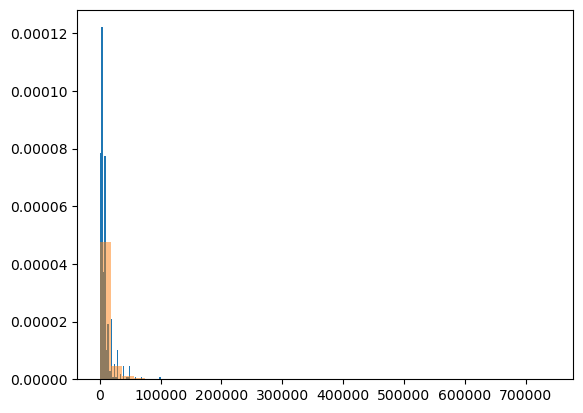

In [ ]:
bon1_1 =df['yj10.2'].tolist()

bon2=np.array(bon1_1)
bon2[bon2 > 99999995.0] = np.nan
bon2_s = np.random.lognormal(μ_hat_bon,σ_hat_bon, size=np.sum(np.isnan(bon2)))
bon2[np.isnan(bon2)] = bon2_s

plt.hist(bon, density=True, bins=40)
plt.hist(bon2, density=True, bins=40, alpha=0.5)

## Зарплата

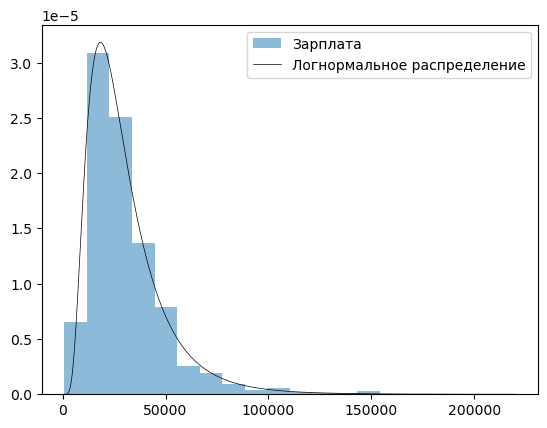

In [575]:
sal = df['yj13.2'].dropna().tolist()
sal = [i for i in sal if i < 99999996 and i>0]

ln_sal = np.log(sal)
μ_hat_sal = np.mean(ln_sal)
num = (ln_sal - μ_hat_sal)**2
σ_hat_sal = (np.mean(num))**(1/2)

dist_lognorm_sal = lognorm(σ_hat_sal, scale = exp(μ_hat_sal))

x = np.arange(int(min(sal))-1, int(max(sal))+1 )
plt.hist(sal, density=True, bins=20, histtype='stepfilled', alpha=0.5, label='Зарплата')
plt.plot(x, dist_lognorm_sal.pdf(x), 'k-', lw=0.5, label='Логнормальное распределение')

plt.legend()
plt.show()


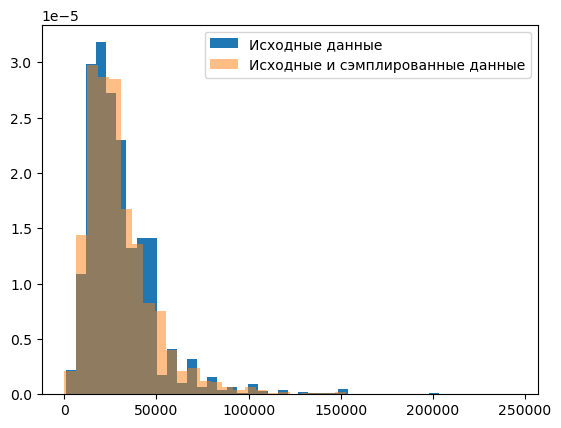

12120


In [660]:
sal2 = np.array(df['yj13.2'].tolist())
sal2[sal2 > 99999995] = np.nan
sal2_s = np.random.lognormal(μ_hat_sal,σ_hat_sal, size=np.sum(np.isnan(sal2)))
sal2[np.isnan(sal2)] = sal2_s


plt.hist(sal, density=True, bins=40, label='Исходные данные')
plt.hist(sal2, density=True, bins=40, alpha=0.5, label='Исходные и сэмплированные данные')
plt.legend()
plt.show()

print(len(sal2))

## Удовлетворенность работой

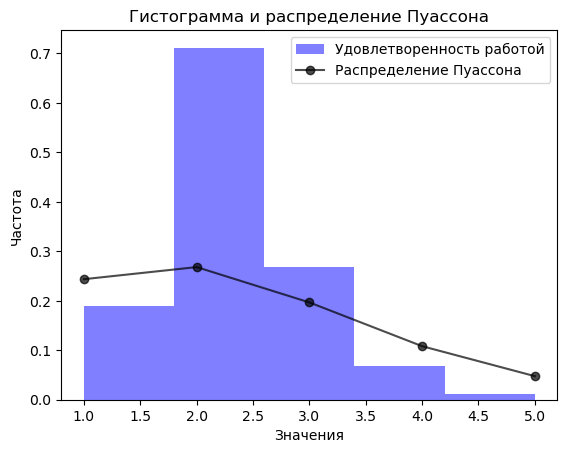

In [578]:
js = df['yj1.1.1'].dropna().tolist()
js = np.array([i for i in js if i < 99999996])

lambda_mle_js = sum(js) / len(js) 

plt.hist(js, bins=5, density=True, alpha=0.5, color='b', label='Удовлетворенность работой')
x = np.arange(1, int(max(js))+1 )
plt.plot(x, poisson.pmf(x, lambda_mle_js), color='k', marker='o', linestyle='-', alpha=0.7, label='Распределение Пуассона')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма и распределение Пуассона')
plt.legend()
plt.show()

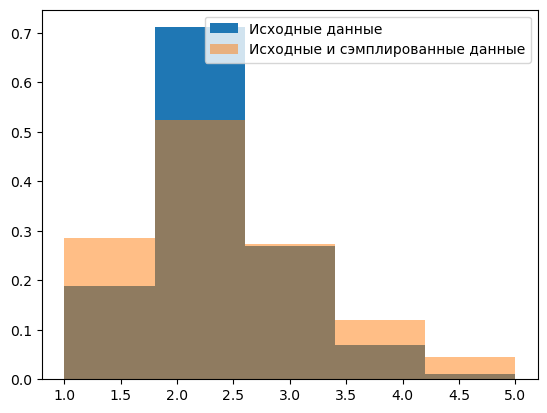

12120


In [659]:
js2 = np.array(df['yj1.1.1'].tolist())
js2[js2 > 6] = np.nan

js2_s = []
js_size=np.sum(np.isnan(js2))

while len(js2_s) < js_size:
    samples =np.random.poisson(lambda_mle_js, size=100)
    filtered_samples = samples[(samples >= min(js[~np.isnan(js)]) ) & (samples <= max(js[~np.isnan(js)]))] 
    js2_s.extend(filtered_samples[:js_size - len(js2_s)])  
    
js2[np.isnan(js2)] = js2_s

plt.hist(js, density=True, bins=5, label='Исходные данные')
plt.hist(js2, density=True, bins=5, alpha=0.5, label='Исходные и сэмплированные данные')
plt.legend()
plt.show()

print(len(js2))

## Образование

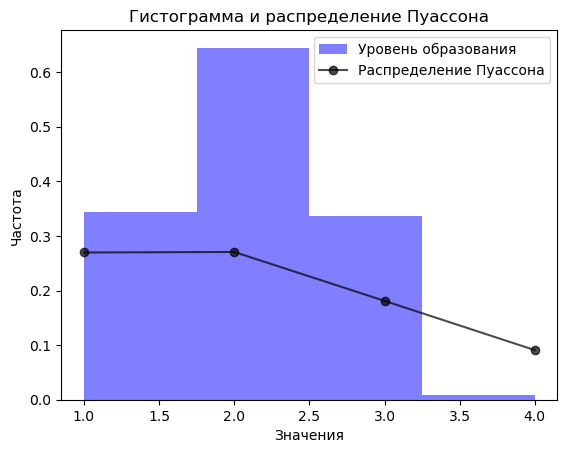

In [653]:
edu = df['yj72.18a'].dropna().tolist()
edu = [ i for i in edu if i < 18]

edu = [
    '1' if i in [1, 2] else 
    '2' if i in [3, 4, 5, 6, 15] else 
    '3' if i in [10, 11, 12] else 
    '4' if i in [16, 17,      13, 14] else 
    str(i) 
    for i in edu
]

edu = np.array([int(x) for x in edu])


lambda_mle_edu = sum(edu) / len(edu) 

plt.hist(edu, bins=4, density=True, alpha=0.5, color='b', label='Уровень образования')
x = np.arange(int(min(edu)), int(max(edu))+1 )
plt.plot(x, poisson.pmf(x, lambda_mle_edu), color='k', marker='o', linestyle='-', alpha=0.7, label='Распределение Пуассона')

plt.xlabel('Значения')
plt.ylabel('Частота')
plt.title('Гистограмма и распределение Пуассона')
plt.legend()
plt.show()



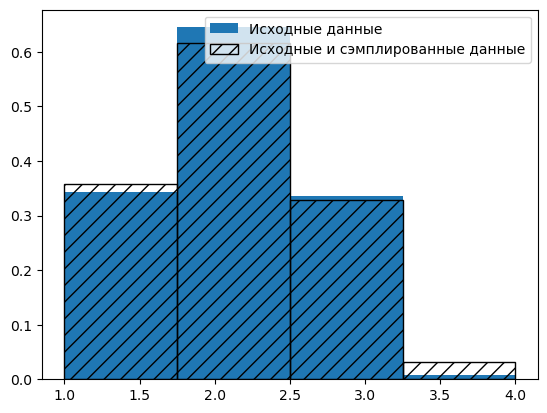

12120


In [658]:
edu2 = np.array(df['yj72.18a'].tolist())
edu2[edu2 >17] = np.nan

edu2[(edu2 == 1) | (edu2 == 2)] = 1
edu2[(edu2 == 3) | (edu2 == 4)| (edu2 == 5)| (edu2 == 6)| (edu2 == 15)] = 2
edu2[(edu2 == 10) | (edu2 == 11)| (edu2 == 12)] = 3
edu2[(edu2 == 16) | (edu2 == 17)| (edu2 == 13)| (edu2 == 14)] = 4

edu2_s = []
edu_size=np.sum(np.isnan(edu2))

while len(edu2_s) < edu_size:
    samples =np.random.poisson(lambda_mle_edu, size=100)
    filtered_samples = samples[(samples >= min(edu[~np.isnan(edu)]) ) & (samples <= max(edu[~np.isnan(edu)]))] 
    edu2_s.extend(filtered_samples[:edu_size - len(edu2_s)])  

    
edu2[np.isnan(edu2)] = edu2_s

plt.hist(edu, density=True, bins=4, label='Исходные данные')
plt.hist(edu2, density=True, bins=4, facecolor='none', edgecolor='black', hatch='//', label='Исходные и сэмплированные данные')
plt.legend()
plt.show()

print(len(edu2))

In [670]:
df2=df_filtered = df[['yj21b', 'yj6.2','yj10.2','yj13.2','yj1.1.1','yj72.18a']]

df2.loc[:, 'yj21b'] = vac2
df2.loc[:, 'yj6.2'] = ww2
df2.loc[:, 'yj10.2'] = bon2
df2.loc[:, 'yj13.2'] = sal2
df2.loc[:, 'yj1.1.1'] = js2
df2.loc[:, 'yj72.18a'] = edu2

df2


,yj21b,yj6.2,yj10.2,yj13.2,yj1.1.1,yj72.18a
0,8.0,34.0,6322.730668,16647.466875,1.0,2.0
1,31.0,52.0,1917.779874,55012.333816,2.0,1.0
2,40.0,36.0,19147.678155,38995.630020,2.0,2.0
3,39.0,47.0,2400.359129,14615.142339,3.0,1.0
4,42.0,40.0,3053.358863,25000.000000,3.0,2.0
...,...,...,...,...,...,...
12115,42.0,40.0,26764.372206,53895.928206,4.0,3.0
12116,14.0,50.0,26338.363208,40000.000000,2.0,2.0
12117,58.0,48.0,4590.241550,15304.017505,2.0,2.0
12118,15.0,47.0,21567.556882,40592.857421,2.0,4.0
